# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
import plotly.graph_objs as go # plotly graphical object

import src.data.timeseries_eda as eda 

init_notebook_mode(connected=True)
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')

# Config

In [3]:
symbol = 'XAUUSD'

# EDA

In [4]:
market_data = pd.read_csv(f'data/{symbol}_4h.csv')
market_data.head()

,open_bid,low_bid,high_bid,close_bid,volume_bid,open_ask,low_ask,high_ask,close_ask,volume_ask,avg_spread,tick_number
0,1183.410034,1183.409058,1187.402954,1186.664062,0.54846,1185.050049,1184.531982,1187.847046,1187.108032,0.64480,0.511757,1476
1,1186.684082,1184.260986,1188.281982,1186.182007,2.10916,1187.119995,1184.578003,1188.621094,1186.478027,2.17188,0.325975,4428
2,1186.260986,1184.480957,1187.481079,1185.842041,3.02581,1186.568970,1184.788940,1187.761963,1186.141968,2.69611,0.299324,6195
3,1185.881104,1180.581055,1187.940918,1182.711060,7.58135,1186.141968,1180.890991,1188.302002,1182.980957,8.02604,0.277019,13557
4,1182.851074,1167.430054,1194.330933,1187.940918,16.77736,1182.980957,1167.908936,1194.708008,1188.234985,18.69664,0.277561,33036


# Features Engineering

In [5]:
from src.data.feature_engineering import PercentageFeatureAdder, BollingerBandAdder, TargetAdder, Scalar

percentage_feature_adder = PercentageFeatureAdder(1)
bidbb_adder = BollingerBandAdder(kind = 'bid')
askbb_adder = BollingerBandAdder(kind = 'ask')
target_adder = TargetAdder(step_number=1 , look_back_steps =2)

pipeline = [bidbb_adder, askbb_adder, percentage_feature_adder, target_adder]

In [6]:
transformed = market_data.copy()
for idx , trans in enumerate(pipeline):
    print(f'Transformation number: {idx + 1}')
    transformed = trans.transform(transformed)
transformed.head()

Transformation number: 1
Transformation number: 2
Transformation number: 3
Transformation number: 4


,open_bid,low_bid,high_bid,close_bid,volume_bid,open_ask,low_ask,high_ask,close_ask,volume_ask,...,hplpcp_ask_4,vvpavg3_ask,vvp3avg3_ask,hc_ask,ho_ask,co_ask,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid
29,1206.711060,1205.642090,1216.429077,1212.498047,15.72042,1207.038940,1205.958008,1216.692017,1212.788940,13.43160,...,0.005619,0.763112,1.011107,0.003208,0.007934,0.004764,NaN,NaN,NaN,NaN
30,1212.498047,1206.649048,1215.231079,1207.568970,10.30222,1212.792969,1206.956909,1215.534912,1207.870972,8.26195,...,0.006262,-0.541464,0.330770,0.006305,0.002256,-0.004058,NaN,NaN,NaN,NaN
31,1207.568970,1206.276001,1209.037964,1208.106934,2.25731,1207.869995,1206.571045,1209.370972,1208.430908,1.45204,...,0.004394,-0.882662,-0.712494,0.000777,0.001241,0.000464,0.165614,0.011603,1207.038940,1206.711060
32,1208.096069,1207.937012,1212.978027,1211.019043,5.11049,1208.430908,1208.270996,1213.278931,1211.318970,4.37757,...,0.003459,0.622826,-1.927543,0.001615,0.003996,0.002390,0.015259,0.348623,1212.792969,1212.498047
33,1210.980957,1210.750977,1214.212036,1211.371094,4.38434,1211.270996,1211.056030,1214.492065,1211.678955,4.81957,...,0.008861,0.124517,-0.969759,0.002316,0.002652,0.000337,0.525060,-0.288767,1207.869995,1207.568970


# Models Training

In [7]:
features = []
for col in transformed.columns:
    features.append(col)
feature = features[4:5]+features[9:-4]
target = features[-4:-2]
transformed.columns

Index(['open_bid', 'low_bid', 'high_bid', 'close_bid', 'volume_bid',
       'open_ask', 'low_ask', 'high_ask', 'close_ask', 'volume_ask',
       'avg_spread', 'tick_number', 'bid_golden/death',
       'bid_standard_deviation', 'bid_upper_band', 'bid_lower_band',
       'bid_middle_band', 'bid_bollinger_touch', 'ask_golden/death',
       'ask_standard_deviation', 'ask_upper_band', 'ask_lower_band',
       'ask_middle_band', 'ask_bollinger_touch', 'hhpc_bid_1', 'llpc_bid_1',
       'hhpc_bid_3', 'llpc_bid_3', 'hplpcp_bid_1', 'hplpcp_bid_3',
       'hplpcp_bid_4', 'vvpavg3_bid', 'vvp3avg3_bid', 'hc_bid', 'ho_bid',
       'co_bid', 'hhpc_ask_1', 'llpc_ask_1', 'hhpc_ask_3', 'llpc_ask_3',
       'hplpcp_ask_1', 'hplpcp_ask_3', 'hplpcp_ask_4', 'vvpavg3_ask',
       'vvp3avg3_ask', 'hc_ask', 'ho_ask', 'co_ask',
       'high_bid_change_rate_target', 'low_ask_change_rate_target',
       'last_open_ask', 'last_open_bid'],
      dtype='object')

In [8]:
from src.data.dataloader import CreateDataset

my_dataset = CreateDataset(transformed, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.7,0.2)

In [9]:
from src.data.dataloader import CreateDataset

my_dataset = CreateDataset(transformed, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.7,0.2)

In [10]:
scalar = Scalar()


In [11]:
train_data[feature] = scalar.fit_transform(train_data[feature])
valid_data[feature] = scalar.transform(valid_data[feature])
test_data[feature] = scalar.transform(test_data[feature])

train_dataset = my_dataset.create_dataset(train_data)
valid_dataset = my_dataset.create_dataset(valid_data)
test_dataset = my_dataset.create_dataset(test_data)

train_loader = my_dataset.create_loader(train_dataset, 128)
valid_loader = my_dataset.create_loader(valid_dataset, 128)
test_loader = my_dataset.create_loader(test_dataset, 128)

In [12]:
DEVICE = 'cuda' 
BATCH_SIZE = 32 
MAX_WAIT = 3
EPOCHS = 25 
LR = 1e-4

In [16]:
from src.models import nn_trainer, lstm_forecaster
import torch
import torch.nn as nn
from src.models import n2n
class Config:
    def __init__(self,hidden_size,window_size) -> None:
        self.hidden_size = hidden_size
        self.window_size = window_size
config = Config(2,10)
rnn_model = n2n.TimeSeriesAutoEnc(
    config,
    input_size = len(feature),
    )

loss_fn = nn.MSELoss() 
optimizer = torch.optim.AdamW(params = rnn_model.parameters() , lr = LR)

In [17]:

train_rnn = nn_trainer.Trainer(rnn_model , optimizer , train_loader , valid_loader, EPOCHS, MAX_WAIT, DEVICE, loss_fn)
train_losses , valid_losses = train_rnn.fit()

TypeError: __init__() missing 1 required positional argument: 'scheduler'

In [ ]:
indexes , high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)

In [ ]:
predictions = pd.DataFrame(
    data = {
        'high_bid_change_rate_target': high_bid_predictions,
        'low_ask_change_rate_target': low_ask_predictions,
    },
    index = indexes
)   
predictions[['last_open_ask','last_open_bid']] = test_data[['last_open_ask','last_open_bid']]
predictions.head()

,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid
12162,0.225958,0.229235,1714.625977,1714.283936
12163,0.224250,0.223300,1712.286011,1711.916016
12164,0.223005,0.221155,1710.182007,1709.837891
12165,0.224366,0.225461,1712.406006,1711.988037
12166,0.230529,0.242023,1707.772095,1707.473999


In [ ]:
predictions = target_adder.retransform(predictions)

In [ ]:
orginal_test_data = market_data[['open_ask','open_bid','low_ask','high_bid']].loc[predictions.index]

In [ ]:
predictions.head()

,high_bid_change_rate_target,low_ask_change_rate_target,last_open_ask,last_open_bid,high_bid,low_ask
12162,0.225958,0.229235,1714.625977,1714.283936,1718.500317,1710.354197
12163,0.224250,0.223300,1712.286011,1711.916016,1716.125813,1708.093302
12164,0.223005,0.221155,1710.182007,1709.837891,1713.995806,1706.056501
12165,0.224366,0.225461,1712.406006,1711.988037,1716.248054,1708.128169
12166,0.230529,0.242023,1707.772095,1707.473999,1711.709005,1703.341520


In [ ]:
orginal_test_data.head()

,open_ask,open_bid,low_ask,high_bid
12162,1710.182007,1709.837891,1709.791992,1713.294067
12163,1712.406006,1711.988037,1706.125977,1713.283936
12164,1707.772095,1707.473999,1706.551880,1713.916992
12165,1708.382080,1708.130981,1706.512085,1714.411011
12166,1708.095947,1707.831055,1695.852051,1707.937988


In [ ]:
import matplotlib.pyplot as plt

class ForecastEval:
    def __init__(self, orginal_data: pd.DataFrame, predicted_data: pd.DataFrame):
        self.orginal_data = orginal_data
        self.predicted_data = predicted_data
        self.eps = 1e-4

    def evaluate_position_accuracy(self):
        high_bid_between = (self.predicted_data['high_bid'] >= self.orginal_data['open_bid']) & (self.predicted_data['high_bid'] <= self.orginal_data['high_bid'])
        low_ask_between = (self.predicted_data['low_ask'] <= self.orginal_data['open_ask']) & (self.orginal_data['low_ask'] <= self.predicted_data['low_ask'])
        both_in_middle = high_bid_between & low_ask_between
        accuracy = both_in_middle.mean() * 100.0
        print("Position Accuracy: {:.2f}%".format(accuracy))
        return accuracy

    def get_absolute_error(self): 
        bid_absolute_error = 100 * abs(
            (self.predicted_data['high_bid'] - self.orginal_data['high_bid']) 
            / ((self.orginal_data['open_bid'] - self.orginal_data['high_bid'])+self.eps)
        )
    

        ask_absolute_error = 100 * (
            abs(self.predicted_data['low_ask'] - self.orginal_data['low_ask']) / 
            ((self.orginal_data['open_ask'] - self.orginal_data['low_ask']) + self.eps)
        )
        return (bid_absolute_error + ask_absolute_error)/2

    def plot_absolute_error(self):
        absolute_error = self.get_absolute_error()
        print("ABS error: " , absolute_error.mean())
        plt.figure(figsize=(10, 6))
        plt.plot(absolute_error.index, absolute_error, marker='o', linestyle='-', color='b')
        plt.xlabel('Data Points')
        plt.ylabel('Absolute Error (%)')
        plt.title('Absolute Error at Each Data Point')
        plt.grid(True)
        plt.show()

    def run_evaluation(self):
      self.evaluate_position_accuracy()
      self.plot_absolute_error()


<Axes: >

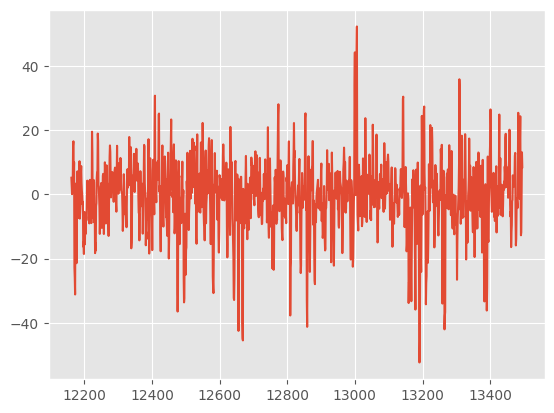

In [ ]:
(predictions['high_bid'] - orginal_test_data['high_bid']).plot()

Position Accuracy: 3.91%
ABS error:  78305.68049398105


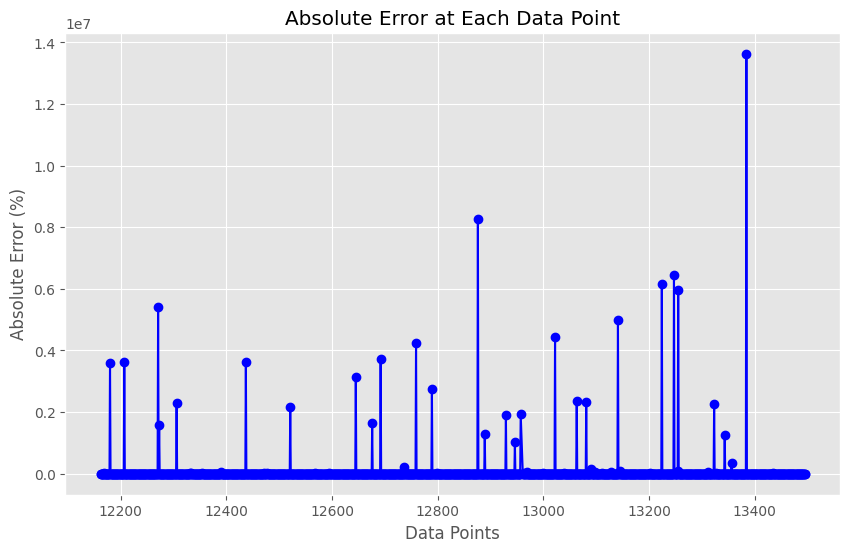

In [ ]:
evaluator= ForecastEval(orginal_data= orginal_test_data , predicted_data = predictions)
evaluator.run_evaluation()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    
    'MAX_WAIT': [2, 3, 4],
    'EPOCHS': [20, 25, 30],
    'LR': [1e-4, 5e-4, 1e-3]
}

all_absolute_errors = []



for max_wait in param_grid['MAX_WAIT']:
        for epochs in param_grid['EPOCHS']:
            for lr in param_grid['LR']:
                
                
                optimizer = torch.optim.AdamW(params=rnn_model.parameters(), lr=lr)
                
                train_rnn = nn_trainer.Trainer(rnn_model, optimizer, train_loader, valid_loader, epochs, max_wait, DEVICE, loss_fn)

                
                train_losses, valid_losses = train_rnn.fit()
                
                
                indexes, high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)
                predictions = pd.DataFrame(data={
                    'high_bid_change_rate_target': high_bid_predictions,
                    'low_ask_change_rate_target': low_ask_predictions,
                }, index=indexes)
                predictions[['last_open_ask', 'last_open_bid']] = test_data[['last_open_ask', 'last_open_bid']]
                predictions = target_adder.retransform(predictions)
                orginal_test_data = market_data[['open_ask', 'open_bid', 'low_ask', 'high_bid']].loc[predictions.index]

                
                evaluator = ForecastEval(orginal_data=orginal_test_data, predicted_data=predictions)

                
                average_absolute_error = evaluator.get_absolute_error()

                
                params_and_error = {
                    
                    'MAX_WAIT': max_wait,
                    'EPOCHS': epochs,
                    'LR': lr,
                    'Absolute_Error': average_absolute_error
                }
                all_absolute_errors.append(params_and_error)


absolute_errors_df = pd.DataFrame(all_absolute_errors)


print(absolute_errors_df)

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.34378302449712883
valid_loss = 0.3257695209412348


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3436363412923104
valid_loss = 0.32541469591004507


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3435578963442429
valid_loss = 0.3253163666952224


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.34350314766571327
valid_loss = 0.3252459814151128


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.34345477618075704
valid_loss = 0.32518432324840907


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.34340894171917763
valid_loss = 0.32512673096997396


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.343364319487198
valid_loss = 0.32507137173698064


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.34332027105060786
valid_loss = 0.32501741250356037


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 8
train_loss = 0.3432764288138699
valid_loss = 0.3249644275222506


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 9
train_loss = 0.34323257902586785
valid_loss = 0.3249121762457348


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 10
train_loss = 0.34318857660164703
valid_loss = 0.324860556494622


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 11
train_loss = 0.3431443027346521
valid_loss = 0.32480954981985544


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 12
train_loss = 0.34309968090540655
valid_loss = 0.3247591590597516


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 13
train_loss = 0.34305467285417224
valid_loss = 0.3247094700733821


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 14
train_loss = 0.3430092294473906
valid_loss = 0.3246605878784543


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 15
train_loss = 0.3429633469597713
valid_loss = 0.3246126728398459


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 16
train_loss = 0.3429170272036179
valid_loss = 0.3245659101577032


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 17
train_loss = 0.34287029253067197
valid_loss = 0.32452053186439334


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 18
train_loss = 0.34282316760839643
valid_loss = 0.3244767948275521


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 19
train_loss = 0.34277570912161387
valid_loss = 0.3244349793309257


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.34228485832745964
valid_loss = 0.32811141794636134


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.34250311895802216
valid_loss = 0.3261651503188269


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.342461197964243
valid_loss = 0.3255612069652194


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3424251175208672
valid_loss = 0.3251877774794896


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3424133809434401
valid_loss = 0.32488169698488145


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.34241090241718936
valid_loss = 0.3246368921938397


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.34244281597234105
valid_loss = 0.3243834880136308


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.342464335564826
valid_loss = 0.3241954431647346


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 8
train_loss = 0.34252099431044347
valid_loss = 0.3239883652755192


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 9
train_loss = 0.3425443222796595
valid_loss = 0.32385316774958656


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 10
train_loss = 0.34255585829551155
valid_loss = 0.32373146074158804


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 11
train_loss = 0.34253398087379094
valid_loss = 0.32362414044993265


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 12
train_loss = 0.34247186880659414
valid_loss = 0.3235327672390711


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 13
train_loss = 0.3423725012186411
valid_loss = 0.32342484451475595


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 14
train_loss = 0.34229940478060694
valid_loss = 0.32328652909823824


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 15
train_loss = 0.3420700882939068
valid_loss = 0.32328395758356365


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 16
train_loss = 0.34191815202703346
valid_loss = 0.32319747904936474


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 17
train_loss = 0.3415457868092769
valid_loss = 0.32355594138304394


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 18
train_loss = 0.3411090060867168
valid_loss = 0.32410773634910583


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 19
train_loss = 0.3401252460238096
valid_loss = 0.32439558917567846
EARLY STOPPING AT EPOCH = 19


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33849886422221726
valid_loss = 0.3352568844954173


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33756703863272797
valid_loss = 0.33073959180286955


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33773148180665197
valid_loss = 0.33945152660210925


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3375572747475392
valid_loss = 0.33970685941832407


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33740489184856415
valid_loss = 0.3395022600889206
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33753904931851336
valid_loss = 0.3247931379647482


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33706047536956296
valid_loss = 0.32479207891793477


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33705489931477084
valid_loss = 0.3249966200618517


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33703647453237223
valid_loss = 0.32505613742839723


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3370170892291778
valid_loss = 0.32508145840395064
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33836156210383855
valid_loss = 0.3237624998603548


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33830598701496384
valid_loss = 0.3278907956111999


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3381296574465326
valid_loss = 0.33005625080494655


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3380579248674818
valid_loss = 0.3309670644147055
EARLY STOPPING AT EPOCH = 3


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3380293457491978
valid_loss = 0.3336568900517055


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3375224992632866
valid_loss = 0.3384205855074383


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33766316411060254
valid_loss = 0.33999505780992056


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33741981656970205
valid_loss = 0.33922665282374337
EARLY STOPPING AT EPOCH = 3


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33688967060801145
valid_loss = 0.3270072837670644


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3364445266087313
valid_loss = 0.3259134129399345


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3364191564756471
valid_loss = 0.3259934335947037


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33637590001563766
valid_loss = 0.32596478469315027


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3363334182146433
valid_loss = 0.32593038784606115
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3378074179227288
valid_loss = 0.3269995081992376


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33756635831417264
valid_loss = 0.3295594013872601


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33743215976534663
valid_loss = 0.3302370515607652


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3373799082395193
valid_loss = 0.3305417597293854
EARLY STOPPING AT EPOCH = 3


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33875239298150345
valid_loss = 0.3304160535335541


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3372211434148453
valid_loss = 0.3281863239549455


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.337259642175726
valid_loss = 0.33080258397828965


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33736324612353297
valid_loss = 0.33264020794913884


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33683370174588384
valid_loss = 0.3302053411801656
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33544573097212893
valid_loss = 0.32656040290991467


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.335073480533587
valid_loss = 0.32542363022054943


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3350137801387826
valid_loss = 0.3253854357060932


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3349637073036787
valid_loss = 0.32534186435597284


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3349232572961498
valid_loss = 0.3253238563026701


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.33488769033873406
valid_loss = 0.3253184138309388


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3348549344652408
valid_loss = 0.32531990572100594


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.3348239133688244
valid_loss = 0.32532530632757006


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 8
train_loss = 0.334794014591623
valid_loss = 0.3253327916775431


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 9
train_loss = 0.3347648810091856
valid_loss = 0.325341203383037
EARLY STOPPING AT EPOCH = 9


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3367876387327104
valid_loss = 0.3252496279421307


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3365544007235282
valid_loss = 0.3257239907979965


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3363937972163832
valid_loss = 0.32584739121652784


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33626135932029905
valid_loss = 0.3260033208699453


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33612763015805064
valid_loss = 0.32616292295001803
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33763025952754794
valid_loss = 0.3264593077557428


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33732748877357793
valid_loss = 0.3290556137050901


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33687817929564295
valid_loss = 0.3287806539308457


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3368294316570501
valid_loss = 0.32944959011815844


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3365960037587462
valid_loss = 0.3291004477512269
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3345715449871244
valid_loss = 0.3272308334708214


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3341116656524104
valid_loss = 0.3258930097023646


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33397162766069977
valid_loss = 0.3258472517842338


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3338828712097696
valid_loss = 0.3257555567792484


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3338174095024934
valid_loss = 0.32570381710926694


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3337623147747001
valid_loss = 0.32567534169980455


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3337122369054201
valid_loss = 0.3256614946183704


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.33366471015521
valid_loss = 0.3256573570626123


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 8
train_loss = 0.3336185086015108
valid_loss = 0.3256600697835286


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 9
train_loss = 0.3335730133427156
valid_loss = 0.3256680518388748


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 10
train_loss = 0.3335278794370793
valid_loss = 0.3256804822456269


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 11
train_loss = 0.3334829395485891
valid_loss = 0.32569699450617745
EARLY STOPPING AT EPOCH = 11


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3355375384358135
valid_loss = 0.32400055158705937


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3350558210466359
valid_loss = 0.3254929713550068


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33483607261567505
valid_loss = 0.32564432812588556


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3346852664206479
valid_loss = 0.326207466068722


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33453888657528
valid_loss = 0.3265404772190821
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3384622544855685
valid_loss = 0.3192280115825789


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3358144207379302
valid_loss = 0.32467241017591386


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33597864512656184
valid_loss = 0.32868554301205133


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3359001015086432
valid_loss = 0.32928645326977685


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33587758696159803
valid_loss = 0.32896395311469123
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3333057267843066
valid_loss = 0.32717952061267125


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3328125429515903
valid_loss = 0.3263550861960366


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33264722060915586
valid_loss = 0.32644753619318917


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33254633421027985
valid_loss = 0.3265832332628114


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33247487528904063
valid_loss = 0.3267236249077888


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.33241741862651464
valid_loss = 0.3268621116876602
EARLY STOPPING AT EPOCH = 5


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3342002742999309
valid_loss = 0.32530557754493894


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3340287508594023
valid_loss = 0.32780446112155914


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3335405385776146
valid_loss = 0.32642416656017303


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3336920828835384
valid_loss = 0.32963244936295916


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3332807389465538
valid_loss = 0.3268736969856989
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33680259235001897
valid_loss = 0.32170825487091426


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33557768246612035
valid_loss = 0.32630196603990735


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33521538680872404
valid_loss = 0.32955185820659


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3346542206567687
valid_loss = 0.3294092501912798


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3346288397505477
valid_loss = 0.33180534839630127
EARLY STOPPING AT EPOCH = 4


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3324944215851861
valid_loss = 0.32921359439690906


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3319227574644862
valid_loss = 0.32812555595522835


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33174051032275764
valid_loss = 0.32856808815683636


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3316476070196242
valid_loss = 0.328640178555534


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3315813999522377
valid_loss = 0.3287362977862358


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.33152754514201266
valid_loss = 0.3288334200070018


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3314803767244558
valid_loss = 0.32893718779087067
EARLY STOPPING AT EPOCH = 6


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33308575624549713
valid_loss = 0.3263204587357385


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33353305165026637
valid_loss = 0.3293587930855297


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33265736960881465
valid_loss = 0.3257445991039276


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3330010354921624
valid_loss = 0.3307867390768869


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33247291669249535
valid_loss = 0.3270797913982755


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3327969635861951
valid_loss = 0.3321078902199155


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3322988812987869
valid_loss = 0.32726932281539556


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.33276342409285337
valid_loss = 0.33296659198545275
EARLY STOPPING AT EPOCH = 7


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33557665992427516
valid_loss = 0.3250723055430821


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3342707452137728
valid_loss = 0.3292374561230342


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33415097672794314
valid_loss = 0.3358819278932753


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3328973128384835
valid_loss = 0.327955251293523


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33462373418985186
valid_loss = 0.3398810752800533


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3342944460140692
valid_loss = 0.32635503120365594
EARLY STOPPING AT EPOCH = 5


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3316040212238157
valid_loss = 0.32772166104543776


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3310717833605972
valid_loss = 0.32924987553131013


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33086312078946345
valid_loss = 0.3296987627233778


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3307278078754206
valid_loss = 0.3299288267181033


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.330628558691289
valid_loss = 0.3301170262552443


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3305484549822034
valid_loss = 0.3302910682700929
EARLY STOPPING AT EPOCH = 5


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33203296856702985
valid_loss = 0.3282958953863099


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3325478822194241
valid_loss = 0.33046779107479823


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3315795218018261
valid_loss = 0.32712311794360477


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33193774078343363
valid_loss = 0.33293661333265756


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3313467790548866
valid_loss = 0.32819833925792147


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3317413361290017
valid_loss = 0.3344344876351811


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.33115106690171603
valid_loss = 0.327803862236795


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.331749777636818
valid_loss = 0.3343020627895991
EARLY STOPPING AT EPOCH = 7


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3340662264743367
valid_loss = 0.33015833014533635


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.3334010907927075
valid_loss = 0.33446282361234936


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.33179637699111086
valid_loss = 0.3264977630405199


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3345632334617344
valid_loss = 0.33053683383124216


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.33294369350816755
valid_loss = 0.3271117444549288


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3328248465786109
valid_loss = 0.33768555912233533


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3322682069564188
valid_loss = 0.331780816472712


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.33240744985035947
valid_loss = 0.3416703726564135
EARLY STOPPING AT EPOCH = 7


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.33019832934479454
valid_loss = 0.3362980853943598


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.32937808123392026
valid_loss = 0.33309286336104077


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.32911980434043986
valid_loss = 0.33278347303469974


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3289629840166182
valid_loss = 0.33278857526325045


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.32884812415451614
valid_loss = 0.33291393021742505


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.32875344851935234
valid_loss = 0.3330694568299112


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.32867015767339114
valid_loss = 0.33322399357954663


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.32859391084796674
valid_loss = 0.3333703407219478
EARLY STOPPING AT EPOCH = 7


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3302078338692317
valid_loss = 0.3323397107777141


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33084858098142855
valid_loss = 0.33294059407143367


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.3297753398482864
valid_loss = 0.32776166640576865


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.33017470466124044
valid_loss = 0.3355251146214349


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.32940965860679344
valid_loss = 0.32969569734164644


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3295739040382811
valid_loss = 0.3388347327709198


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.32900716213358416
valid_loss = 0.32861033436797915


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.3296500457501089
valid_loss = 0.33783975669315885
EARLY STOPPING AT EPOCH = 7


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 0
train_loss = 0.3320377290852972
valid_loss = 0.33614513242528554


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 1
train_loss = 0.33310434524271937
valid_loss = 0.3298605226335071


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 2
train_loss = 0.331480391826984
valid_loss = 0.3220041940609614


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 3
train_loss = 0.3316114190462473
valid_loss = 0.3358308364238058


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 4
train_loss = 0.3305953314175477
valid_loss = 0.3300575472059704


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 5
train_loss = 0.3304704724735505
valid_loss = 0.3442447455156417


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 6
train_loss = 0.3296657431165914
valid_loss = 0.3263114903654371


  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

EPOCH = 7
train_loss = 0.3315873199419395
valid_loss = 0.33241772403319675
EARLY STOPPING AT EPOCH = 7
    MAX_WAIT  EPOCHS      LR  \
0          2      20  0.0001   
1          2      20  0.0005   
2          2      20  0.0010   
3          2      25  0.0001   
4          2      25  0.0005   
5          2      25  0.0010   
6          2      30  0.0001   
7          2      30  0.0005   
8          2      30  0.0010   
9          3      20  0.0001   
10         3      20  0.0005   
11         3      20  0.0010   
12         3      25  0.0001   
13         3      25  0.0005   
14         3      25  0.0010   
15         3      30  0.0001   
16         3      30  0.0005   
17         3      30  0.0010   
18         4      20  0.0001   
19         4      20  0.0005   
20         4      20  0.0010   
21         4      25  0.0001   
22         4      25  0.0005   
23         4      25  0.0010   
24         4      30  0.0001   
25         4      30  0.0005   
26         4      30  0.0010   

